In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [9]:
carData = pd.read_csv('dataCar_Columns.csv')
carData1 = carData.drop('Unnamed: 0',axis=1)
carData1

,车型_品牌,车主报价（万）,新车指导价（万）,车牌注册日期,里程（万公里）,排量,变速箱
0,大众 途观 2010款 2.0TSI 自动四驱菁英版,8.70,30.59,2011年,6.54万公里,2.0T,自动
1,大众 速腾 2014款 改款 1.4TSI 手动豪华型,6.70,16.69,2015年,5.2万公里,1.4T,手动
2,大众 迈腾 2012款 改款 1.8TSI 领先型,8.00,23.86,2012年,15.1万公里,1.8T,自动
3,大众 宝来 2012款 1.6L 自动时尚型,4.78,13.00,2012年,11.8万公里,1.6L,自动
4,大众 朗逸 2013款 改款经典 1.6L 自动风尚版,6.98,13.56,2017年,3.37万公里,1.6L,自动
...,...,...,...,...,...,...,...
33830,大众 捷达 2019款 梦想版 1.5L 自动时尚型,6.88,10.29,2019年,2.8万公里,1.5L,自动
33831,大众 捷达 2017款 1.4L 手动时尚型,5.20,8.67,2019年,2.2万公里,1.4L,手动
33832,大众 捷达 2015款 1.4L 手动舒适型,4.48,10.07,2016年,7.86万公里,1.4L,手动
33833,大众 捷达 2017款 1.5L 自动时尚型,5.80,10.38,2017年,3万公里,1.5L,自动


In [11]:
carData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33835 entries, 0 to 33834
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   车型_品牌     33835 non-null  object 
 1   车主报价（万）   33835 non-null  float64
 2   新车指导价（万）  33835 non-null  float64
 3   车牌注册日期    33835 non-null  object 
 4   里程（万公里）   33835 non-null  object 
 5   排量        33835 non-null  object 
 6   变速箱       33835 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.8+ MB


In [13]:
carData1.shape

(33835, 7)

In [15]:
carData1.isnull().sum()

车型_品牌       0
车主报价（万）     0
新车指导价（万）    0
车牌注册日期      0
里程（万公里）     0
排量          0
变速箱         0
dtype: int64

In [17]:
carData1.describe()

,车主报价（万）,新车指导价（万）
count,33835.000000,33835.000000
mean,12.220385,22.576605
std,8.998722,15.175450
min,0.660000,4.110000
25%,6.800000,13.330000
50%,9.680000,18.210000
75%,14.800000,27.440000
max,99.990000,334.320000


In [67]:
# 数据清洗

# 异常值处理
carData1['变速箱'].unique()

array(['自动', '手动', '1.5L', '4.0L', '1.5T'], dtype=object)

In [68]:
carData1['排量'].unique()

array(['2.0T', '1.4T', '1.8T', '1.6L', '1.4L', '1.5L', '3.0T', '1.2T',
       '2.0L', '3.6L', '3.0L', '2.5T', '1.8L', '2.5L', '1.6T', '1.5T',
       '4.4T', '1.7L', '3.5L', '1.3T', '4.0T', '6.2L', '5.5T', '5.5L',
       '30.0L', '4.7L', '2.7L', '4.0L', '1.3L', '2.4L', '5.7L', '4.6L',
       '2.6L', '4.3L', '成都', '2.7T', '1.0T', '2.9T', '2.8L', '4.2L',
       '14.0T', '3.6T', '3.2L', '5.6L', '3.8T', '2.3L', '2.3T', '2.8T',
       '3.5T', '2.2T', '2.4T', '3.8L', '9.8L', '1.2L', '0.8L', '1.0L',
       '4.8L', '1.9T', '5.0L', '3.4L', '1.1T', '10.0L', '18.0T', '0.0L',
       '16.0L'], dtype=object)

In [70]:
# 删除异常值，选择删除异常值之后的数据
df1=carData1[carData1['变速箱'].isin(['自动', '手动'])]
df1['排量'].unique()

array(['2.0T', '1.4T', '1.8T', '1.6L', '1.4L', '1.5L', '3.0T', '1.2T',
       '2.0L', '3.6L', '3.0L', '2.5T', '1.8L', '2.5L', '1.6T', '1.5T',
       '4.4T', '1.7L', '3.5L', '1.3T', '4.0T', '6.2L', '5.5T', '5.5L',
       '30.0L', '4.7L', '2.7L', '4.0L', '1.3L', '2.4L', '5.7L', '4.6L',
       '2.6L', '4.3L', '2.7T', '1.0T', '2.9T', '2.8L', '4.2L', '14.0T',
       '3.6T', '3.2L', '5.6L', '3.8T', '2.3L', '2.3T', '2.8T', '3.5T',
       '2.2T', '2.4T', '3.8L', '9.8L', '1.2L', '0.8L', '1.0L', '4.8L',
       '1.9T', '5.0L', '3.4L', '1.1T', '10.0L', '18.0T', '0.0L', '16.0L'],
      dtype=object)

In [76]:
# 将所有可能的字符类变量转换为数值变量
df1['变速箱'].replace({'自动':0,'手动':1},inplace=True)
df1['排量'].unique()

array(['2.0T', '1.4T', '1.8T', '1.6L', '1.4L', '1.5L', '3.0T', '1.2T',
       '2.0L', '3.6L', '3.0L', '2.5T', '1.8L', '2.5L', '1.6T', '1.5T',
       '4.4T', '1.7L', '3.5L', '1.3T', '4.0T', '6.2L', '5.5T', '5.5L',
       '30.0L', '4.7L', '2.7L', '4.0L', '1.3L', '2.4L', '5.7L', '4.6L',
       '2.6L', '4.3L', '2.7T', '1.0T', '2.9T', '2.8L', '4.2L', '14.0T',
       '3.6T', '3.2L', '5.6L', '3.8T', '2.3L', '2.3T', '2.8T', '3.5T',
       '2.2T', '2.4T', '3.8L', '9.8L', '1.2L', '0.8L', '1.0L', '4.8L',
       '1.9T', '5.0L', '3.4L', '1.1T', '10.0L', '18.0T', '0.0L', '16.0L'],
      dtype=object)

In [87]:
df1['里程（万公里）'] = df1['里程（万公里）'].str.split('万公里', expand=True)[0].apply(pd.to_numeric, errors ='ignore')

AttributeError: Can only use .str accessor with string values!

In [93]:
df1['车牌注册日期'] = df1['车牌注册日期'].str.split('年', expand=True)[0].apply(pd.to_numeric, errors ='ignore')
df1

D:\Program Files (x86)\Anaconda3\envs\myfirstpytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,车型_品牌,车主报价（万）,新车指导价（万）,车牌注册日期,里程（万公里）,排量,变速箱
0,大众 途观 2010款 2.0TSI 自动四驱菁英版,8.70,30.59,2011,6.54,2.0T,0
1,大众 速腾 2014款 改款 1.4TSI 手动豪华型,6.70,16.69,2015,5.20,1.4T,1
2,大众 迈腾 2012款 改款 1.8TSI 领先型,8.00,23.86,2012,15.10,1.8T,0
3,大众 宝来 2012款 1.6L 自动时尚型,4.78,13.00,2012,11.80,1.6L,0
4,大众 朗逸 2013款 改款经典 1.6L 自动风尚版,6.98,13.56,2017,3.37,1.6L,0
...,...,...,...,...,...,...,...
33830,大众 捷达 2019款 梦想版 1.5L 自动时尚型,6.88,10.29,2019,2.80,1.5L,0
33831,大众 捷达 2017款 1.4L 手动时尚型,5.20,8.67,2019,2.20,1.4L,1
33832,大众 捷达 2015款 1.4L 手动舒适型,4.48,10.07,2016,7.86,1.4L,1
33833,大众 捷达 2017款 1.5L 自动时尚型,5.80,10.38,2017,3.00,1.5L,0


In [94]:
# 将车牌注册日期转换为车龄
df1['车龄'] = 2021-df1['车牌注册日期']
df1

D:\Program Files (x86)\Anaconda3\envs\myfirstpytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,车型_品牌,车主报价（万）,新车指导价（万）,车牌注册日期,里程（万公里）,排量,变速箱,车龄
0,大众 途观 2010款 2.0TSI 自动四驱菁英版,8.70,30.59,2011,6.54,2.0T,0,10
1,大众 速腾 2014款 改款 1.4TSI 手动豪华型,6.70,16.69,2015,5.20,1.4T,1,6
2,大众 迈腾 2012款 改款 1.8TSI 领先型,8.00,23.86,2012,15.10,1.8T,0,9
3,大众 宝来 2012款 1.6L 自动时尚型,4.78,13.00,2012,11.80,1.6L,0,9
4,大众 朗逸 2013款 改款经典 1.6L 自动风尚版,6.98,13.56,2017,3.37,1.6L,0,4
...,...,...,...,...,...,...,...,...
33830,大众 捷达 2019款 梦想版 1.5L 自动时尚型,6.88,10.29,2019,2.80,1.5L,0,2
33831,大众 捷达 2017款 1.4L 手动时尚型,5.20,8.67,2019,2.20,1.4L,1,2
33832,大众 捷达 2015款 1.4L 手动舒适型,4.48,10.07,2016,7.86,1.4L,1,5
33833,大众 捷达 2017款 1.5L 自动时尚型,5.80,10.38,2017,3.00,1.5L,0,4


In [96]:
carData1

,车型_品牌,车主报价（万）,新车指导价（万）,车牌注册日期,里程（万公里）,排量,变速箱
0,大众 途观 2010款 2.0TSI 自动四驱菁英版,8.70,30.59,2011年,6.54万公里,2.0T,自动
1,大众 速腾 2014款 改款 1.4TSI 手动豪华型,6.70,16.69,2015年,5.2万公里,1.4T,手动
2,大众 迈腾 2012款 改款 1.8TSI 领先型,8.00,23.86,2012年,15.1万公里,1.8T,自动
3,大众 宝来 2012款 1.6L 自动时尚型,4.78,13.00,2012年,11.8万公里,1.6L,自动
4,大众 朗逸 2013款 改款经典 1.6L 自动风尚版,6.98,13.56,2017年,3.37万公里,1.6L,自动
...,...,...,...,...,...,...,...
33830,大众 捷达 2019款 梦想版 1.5L 自动时尚型,6.88,10.29,2019年,2.8万公里,1.5L,自动
33831,大众 捷达 2017款 1.4L 手动时尚型,5.20,8.67,2019年,2.2万公里,1.4L,手动
33832,大众 捷达 2015款 1.4L 手动舒适型,4.48,10.07,2016年,7.86万公里,1.4L,手动
33833,大众 捷达 2017款 1.5L 自动时尚型,5.80,10.38,2017年,3万公里,1.5L,自动


In [115]:
df1['车型_品牌'].str.split(' ', expand=True)[0].value_counts()[0:200]

大众           10566
日产            1494
福特            1457
现代            1449
雪佛兰           1365
             ...  
DS               2
奔驰SLS级AMG        2
斯巴鲁XV            2
中华V3             2
雷克萨斯IS           2
Name: 0, Length: 200, dtype: int64

In [283]:
listxx = ['大众','奔驰','宝马','奥迪','日产','丰田','本田','马自达','哈弗','东风','别克','福特','现代','雪佛兰','吉利','斯巴鲁','雷克萨斯']

In [184]:
dazhong_data = df1.loc[df1['车型_品牌'].str.contains('大众')]
age_value = dazhong_data['车型_品牌'].groupby(dazhong_data['车龄']).count().tolist()
age_label = dazhong_data['车龄'].unique()
age_label = np.sort(age_label).tolist()
age_label

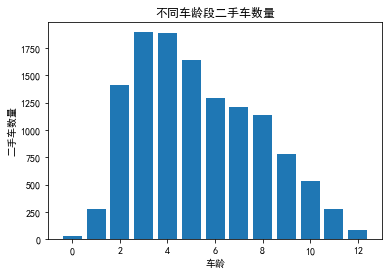

In [211]:
plt.figure()
plt.bar(age_label,age_value)
# plt.legend(patches,
#            labels=['%s, %1.1f %%' % (l, s) for l, s in zip(age_label, age_value)],
#            fontsize=12,
#            title="车龄",
#            loc="center left",
#            bbox_to_anchor=(0.91, 0, 0.3, 1))
# Equal aspect ratio 保证画出的图是正圆形
plt.title('不同车龄段二手车数量')
plt.xlabel('车龄')
plt.ylabel('二手车数量')
plt.show()

D:\Program Files (x86)\Anaconda3\envs\myfirstpytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,车型_品牌,车主报价（万）,新车指导价（万）,车牌注册日期,里程（万公里）,排量,变速箱,车龄,折扣率
0,大众 途观 2010款 2.0TSI 自动四驱菁英版,8.70,30.59,2011,6.54,2.0T,0,10,71.559333
1,大众 速腾 2014款 改款 1.4TSI 手动豪华型,6.70,16.69,2015,5.20,1.4T,1,6,59.856201
2,大众 迈腾 2012款 改款 1.8TSI 领先型,8.00,23.86,2012,15.10,1.8T,0,9,66.471081
3,大众 宝来 2012款 1.6L 自动时尚型,4.78,13.00,2012,11.80,1.6L,0,9,63.230769
4,大众 朗逸 2013款 改款经典 1.6L 自动风尚版,6.98,13.56,2017,3.37,1.6L,0,4,48.525074
...,...,...,...,...,...,...,...,...,...
33830,大众 捷达 2019款 梦想版 1.5L 自动时尚型,6.88,10.29,2019,2.80,1.5L,0,2,33.138970
33831,大众 捷达 2017款 1.4L 手动时尚型,5.20,8.67,2019,2.20,1.4L,1,2,40.023068
33832,大众 捷达 2015款 1.4L 手动舒适型,4.48,10.07,2016,7.86,1.4L,1,5,55.511420
33833,大众 捷达 2017款 1.5L 自动时尚型,5.80,10.38,2017,3.00,1.5L,0,4,44.123314


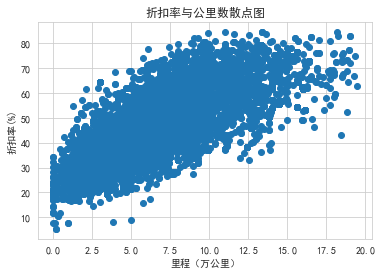

In [232]:
discount=(dazhong_data.loc[:,'新车指导价（万）']-dazhong_data.loc[:,'车主报价（万）'])*100/dazhong_data.loc[:,'新车指导价（万）']
dazhong_data['折扣率'] = discount
plt.scatter(dazhong_data['里程（万公里）'],discount)
plt.xlabel('里程（万公里）')
plt.ylabel('折扣率(%)')
plt.title('折扣率与公里数散点图')
dazhong_data

<AxesSubplot:xlabel='车牌注册日期', ylabel='折扣率'>

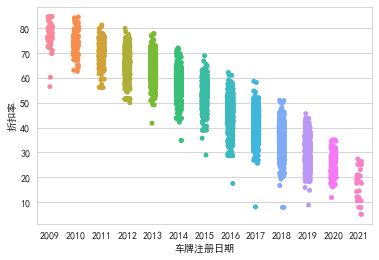

In [235]:
sns.stripplot(x="车牌注册日期",y="折扣率",data=dazhong_data) 

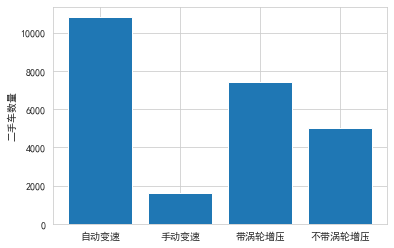

In [271]:
gear_data_value = dazhong_data['车型_品牌'].groupby(dazhong_data['变速箱']).count().tolist()
gear_data_label = ['自动变速','手动变速', '带涡轮增压','不带涡轮增压']
pailiang_data_value = [dazhong_data.loc[dazhong_data['排量'].str.contains('T')].shape[0],dazhong_data.loc[dazhong_data['排量'].str.contains('L')].shape[0]]
pailiang_data_value
pailiang_gear = [gear_data_value[0],gear_data_value[1],pailiang_data_value[0],pailiang_data_value[1]]
plt.bar(gear_data_label,pailiang_gear)
plt.ylabel('二手车数量')
plt.show()

D:\Program Files (x86)\Anaconda3\envs\myfirstpytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '二手车数量')

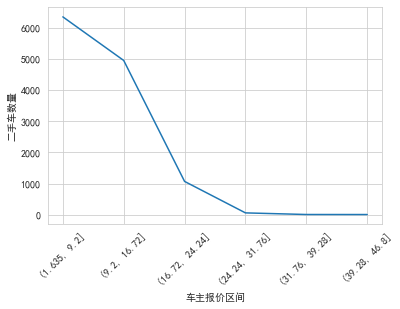

In [277]:
dazhong_data['车主报价区间'] = pd.cut(x=dazhong_data["车主报价（万）"],bins=6)
baojia_value = dazhong_data['车型_品牌'].groupby(dazhong_data['车主报价区间']).count()
baojia_value.plot()
plt.xticks(rotation = 45)
plt.ylabel('二手车数量')

D:\Program Files (x86)\Anaconda3\envs\myfirstpytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '二手车数量')

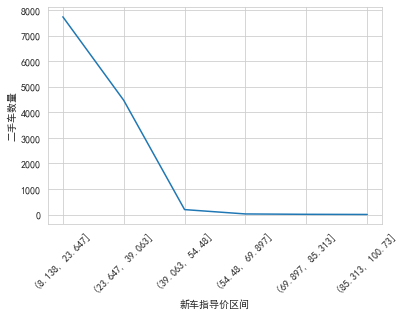

In [278]:
dazhong_data['新车指导价区间'] = pd.cut(x=dazhong_data["新车指导价（万）"],bins=6)
new_value = dazhong_data['车型_品牌'].groupby(dazhong_data['新车指导价区间']).count()
new_value.plot()
plt.xticks(rotation = 45)
plt.ylabel('二手车数量')

D:\Program Files (x86)\Anaconda3\envs\myfirstpytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '二手车数量')

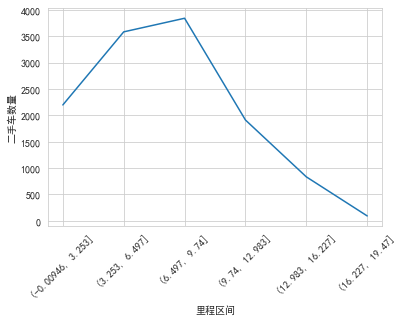

In [279]:
dazhong_data['里程区间'] = pd.cut(x=dazhong_data["里程（万公里）"],bins=6)
kilo_value = dazhong_data['车型_品牌'].groupby(dazhong_data['里程区间']).count()
kilo_value.plot()
plt.xticks(rotation = 45)
plt.ylabel('二手车数量')

{'大众': 12451, '奔驰': 1710, '宝马': 1578, '奥迪': 1675, '日产': 1505, '丰田': 1339, '本田': 1699, '马自达': 1590, '哈弗': 1192, '东风': 10, '别克': 1461, '福特': 1460, '现代': 1776, '雪佛兰': 1365, '吉利': 1400, '斯巴鲁': 5, '雷克萨斯': 17}


Text(0, 0.5, '二手车数量')

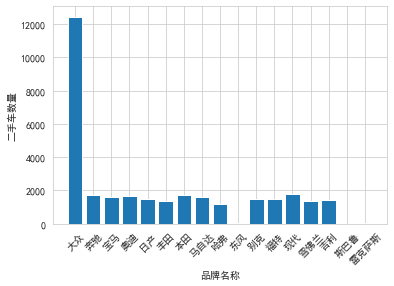

In [298]:
# 总体分析
che_count = {}
for i in range(len(listxx)):
    che_count[listxx[i]] = df1.loc[df1['车型_品牌'].str.contains(listxx[i])].shape[0]
print(che_count)
plt.bar(che_count.keys(),che_count.values())
plt.xticks(rotation = 45)
plt.xlabel('品牌名称')
plt.ylabel('二手车数量')